# **1.Data Exploration**

In [91]:
!pip install catboost

In [208]:
# Importing Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline

import itertools

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load Dataset**

In [93]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving hotel_data.csv to hotel_data (1).csv


In [94]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['hotel_data.csv']))

In [95]:
# Print Multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# **2.Data Visualization (EDA)**

In [96]:
#Explore Data
data.shape
type(data)
data.size
data.shape
data.head()
data.tail()
data.info()

(10504, 12)

pandas.core.frame.DataFrame

126048

(10504, 12)

,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1,2.0,Rs.13062,"Lodging,Motels,Hotels,Meeting & Event Planning...",15400
1,1,The Point,Po Box 1327,Saranac Lake,How to Feel like you are truly Royalty!,DrThought,After having stayed at The Point for five days...,5,NaN,NaN,"Hotels,Hotel,Restaurants",3702
2,1,The Point,Po Box 1327,Saranac Lake,Not to be missed,Dushi110,The Point exceeds perfection. From the moment ...,5,NaN,NaN,"Hotels,Hotel,Restaurants",3738
3,1,The Point,Po Box 1327,Saranac Lake,The most amazing place....,GracieLouNY,My review is long overdue but I tell so many p...,5,NaN,NaN,"Hotels,Hotel,Restaurants",4593
4,1,The Point,Po Box 1327,Saranac Lake,Lack of maintenance,Guillen,We were picked up from the airport in a car wh...,2,NaN,NaN,"Hotels,Hotel,Restaurants",4657


,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
10499,1427,The Cornstalk Hotel,915 Royal St,New Orleans,Could easily be so much more.,PedroPirates,"Dirty carpet, dirty bathroom flooring. One lig...",3,3.0,Rs.13563,"Hotels,Hotels and motels,Lodging,Hotels Motels...",9040
10500,1427,The Cornstalk Hotel,915 Royal St,New Orleans,Love this Hotel!!!!,jules19600,One of the best places you will ever stay in N...,5,3.0,Rs.13563,"Hotels,Hotels and motels,Lodging,Hotels Motels...",14754
10501,1427,The Cornstalk Hotel,915 Royal St,New Orleans,Cornstalk,rsberg03,I loved my stay at Cornstalk. The atmosphere i...,5,3.0,Rs.13563,"Hotels,Hotels and motels,Lodging,Hotels Motels...",16439
10502,1427,The Cornstalk Hotel,915 Royal St,New Orleans,Wonderful Old New Orleans Hotel,scottahutson,We had an amazing time at the Cornstalk Hotel....,5,3.0,Rs.13563,"Hotels,Hotels and motels,Lodging,Hotels Motels...",16569
10503,1427,The Cornstalk Hotel,915 Royal St,New Orleans,I would return- to the 1st floor!,A Traveler1,Stay downstairs- no elevators. No bell hops. N...,3,3.0,Rs.13563,"Hotels,Hotels and motels,Lodging,Hotels Motels...",17580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504 entries, 0 to 10503
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        10504 non-null  int64  
 1   Hotel           10504 non-null  object 
 2   Address         10504 non-null  object 
 3   City            10504 non-null  object 
 4   Title           10493 non-null  object 
 5   Users           10504 non-null  object 
 6   Reviews         10503 non-null  object 
 7   Rating          10504 non-null  int64  
 8   Hotel_Type      10166 non-null  float64
 9   Price           9834 non-null   object 
 10  Hotel_Category  10504 non-null  object 
 11  User_id         10504 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 984.9+ KB


In [97]:
# Checking for missing values
pd.isnull(data).any()
pd.isnull(data).sum()

Hotel_id          False
Hotel             False
Address           False
City              False
Title              True
Users             False
Reviews            True
Rating            False
Hotel_Type         True
Price              True
Hotel_Category    False
User_id           False
dtype: bool

Hotel_id            0
Hotel               0
Address             0
City                0
Title              11
Users               0
Reviews             1
Rating              0
Hotel_Type        338
Price             670
Hotel_Category      0
User_id             0
dtype: int64

In [98]:
# Dropping the missing values
data = data.dropna()
data = data.reset_index(drop=True)
print('Shape of dataset ',data.shape)
print(data.columns)

Shape of dataset  (9813, 12)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users', 'Reviews',
       'Rating', 'Hotel_Type', 'Price', 'Hotel_Category', 'User_id'],
      dtype='object')


In [99]:
# Ratings Count
data.Rating.value_counts()

5    4496
4    2844
3    1307
2     598
1     568
Name: Rating, dtype: int64

In [100]:
print("Mean rating : {}".format(data['Rating'].mean()))
print("Mean rating standard deviation: {}".format(data['Rating'].std()))

Mean rating : 4.029450728625293
Mean rating standard deviation: 1.1641860075931734


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

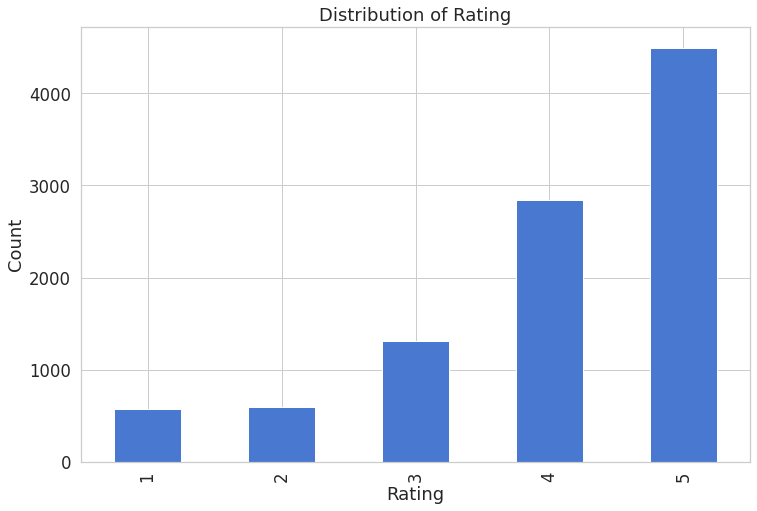

In [101]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

(array([ 36.,   8.,  30.,  38.,  24., 115.,  87., 219., 182., 335.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'mean rating given by each reviewer')

Text(0, 0.5, 'number of reviewers')

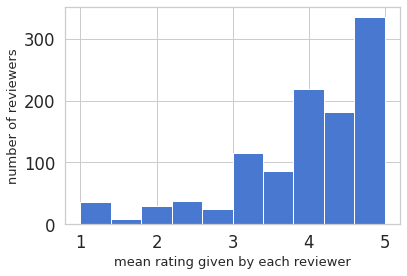

In [102]:
mean_rating_of_user = data.groupby('Hotel').apply(lambda x: x['Rating'].mean())

fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each reviewer', fontsize=13)
ax.set_ylabel('number of reviewers', fontsize=13)

In [103]:
# Dividing the Sentiment into "Positive" and "Negative" w.r.t to the Rating
data['Sentiment'] = data['Rating'].apply(lambda Rating: 'Positive' if Rating > 3 else 'Negative')
data.head(5)

,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id,Sentiment
0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1,2.0,Rs.13062,"Lodging,Motels,Hotels,Meeting & Event Planning...",15400,Negative
1,2,Inn At Queen Anne,505 1st Ave N,Seattle,Terrible service,A Traveler,I stayed here with a couple friends the night ...,2,2.0,Rs.8457,"hotel,Hotels",710,Negative
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,Old and smelly,Alexia Sam,I've stayed in a lot of old restored hotels an...,1,2.0,Rs.8457,"hotel,Hotels",972,Negative
3,2,Inn At Queen Anne,505 1st Ave N,Seattle,188 year old building makes for a great hotel!,Alicia,Enjoyed our stay here so much that we extended...,5,2.0,Rs.8457,"hotel,Hotels",995,Positive
4,2,Inn At Queen Anne,505 1st Ave N,Seattle,"Quaint, clean and perfect!",Alicia Gottsch,This is by far the BEST hotel we have ever vis...,5,2.0,Rs.8457,"hotel,Hotels",996,Positive


In [104]:
# Sentiment Count
data.Sentiment.value_counts()


Positive    7340
Negative    2473
Name: Sentiment, dtype: int64

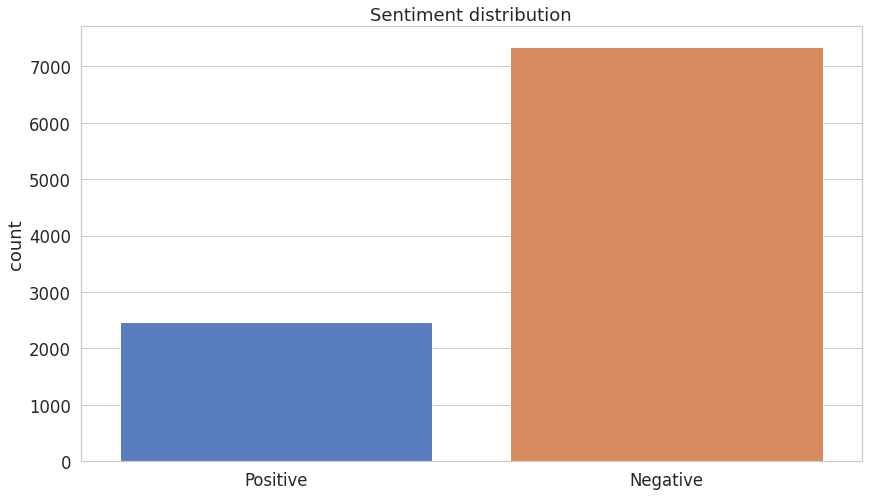

In [105]:
# Plot Showing Sentiment Distribution
f = sns.countplot(x='Sentiment', data=data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Positive', 'Negative'])
plt.xlabel("");

In [106]:
#Check for missing value
pd.isnull(data).any()
pd.isnull(data).sum()

Hotel_id          False
Hotel             False
Address           False
City              False
Title             False
Users             False
Reviews           False
Rating            False
Hotel_Type        False
Price             False
Hotel_Category    False
User_id           False
Sentiment         False
dtype: bool

Hotel_id          0
Hotel             0
Address           0
City              0
Title             0
Users             0
Reviews           0
Rating            0
Hotel_Type        0
Price             0
Hotel_Category    0
User_id           0
Sentiment         0
dtype: int64

In [107]:
data['Reviews'] = data['Reviews'].fillna('').apply(str)

In [108]:
positive_sentiment=data[data['Sentiment'] == 'Positive']
negative_sentiment=data[data['Sentiment']=='Negative']

In [109]:

Reviews_all=" ".join(review for review in data.Sentiment)
Reviews_positive=" ".join(review for review in positive_sentiment.Reviews)


In [110]:
Reviews_negative=" ".join(review for review in negative_sentiment.Reviews)

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


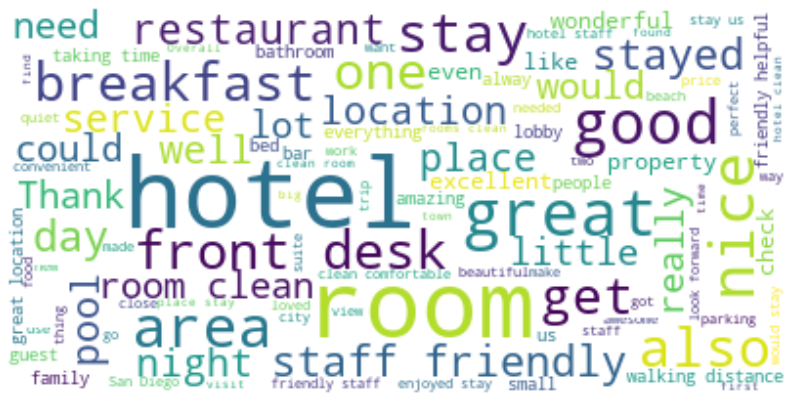

In [111]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_positive)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


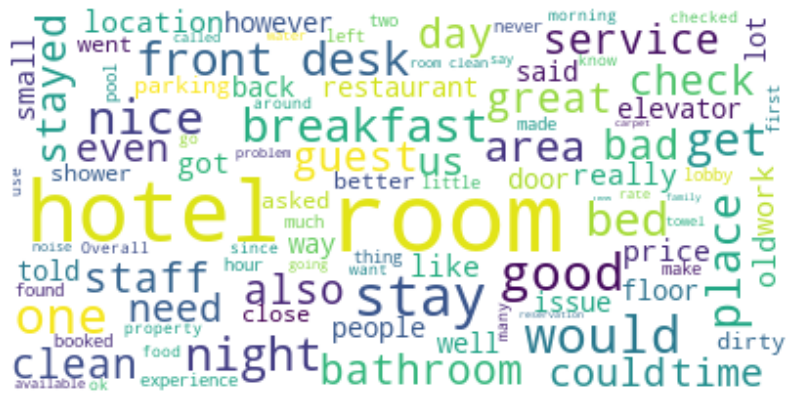

In [112]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_negative)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

# **3.Text Processing**

The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

1.remove Punctuations 

2.Tokenization and Lematization

3.convert to lower case

4.remove stop words such as "the" and "and" if needed










In [113]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['Reviews'].apply(lambda x: remove_punct(x))

In [114]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

In [115]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [116]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


In [117]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [118]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]

In [119]:
result = [' '.join(sen) for sen in filtered_words]

In [120]:
data['Text_Clean'] = result

In [121]:
# Showing the Review of index "3" after the text pre-processing
result[3]

'enjoyed stay much extended extra nights friendly staff clean room selflaundry basement main building keycard go oldschool actual keys bed supercomfortable ac ceiling fan kept us cool heat wave shower needs better water pressure water temperature perfect'

In [122]:
data['tokens'] = filtered_words


In [123]:
data = data[['Hotel_id','Hotel','Title','Users','Reviews','Text_Clean', 'Rating','tokens','Sentiment']]
data.head(5)

,Hotel_id,Hotel,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment
0,0,La Quinta,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,hotel dump upon checking told place booked fol...,1,"[hotel, dump, upon, checking, told, place, boo...",Negative
1,2,Inn At Queen Anne,Terrible service,A Traveler,I stayed here with a couple friends the night ...,stayed couple friends night seattle rock n rol...,2,"[stayed, couple, friends, night, seattle, rock...",Negative
2,2,Inn At Queen Anne,Old and smelly,Alexia Sam,I've stayed in a lot of old restored hotels an...,ive stayed lot old restored hotels love one he...,1,"[ive, stayed, lot, old, restored, hotels, love...",Negative
3,2,Inn At Queen Anne,188 year old building makes for a great hotel!,Alicia,Enjoyed our stay here so much that we extended...,enjoyed stay much extended extra nights friend...,5,"[enjoyed, stay, much, extended, extra, nights,...",Positive
4,2,Inn At Queen Anne,"Quaint, clean and perfect!",Alicia Gottsch,This is by far the BEST hotel we have ever vis...,far best hotel ever visited inn built 1928 apa...,5,"[far, best, hotel, ever, visited, inn, built, ...",Positive


In [180]:
# Importing the clean dataset to the local
from google.colab import files
data.to_csv('hotel_data_clean.csv')
files.download('hotel_data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
# The "Positive" Sentiment has been labelled as "1" and the "Negative" as "0"
data['Label'] = data['Sentiment'].apply(lambda Sentiment: '1' if Sentiment is 'Positive' else '0')
data.head(5)

,Hotel_id,Hotel,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment,Label
0,0,La Quinta,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,hotel dump upon checking told place booked fol...,1,"[hotel, dump, upon, checking, told, place, boo...",Negative,0
1,2,Inn At Queen Anne,Terrible service,A Traveler,I stayed here with a couple friends the night ...,stayed couple friends night seattle rock n rol...,2,"[stayed, couple, friends, night, seattle, rock...",Negative,0
2,2,Inn At Queen Anne,Old and smelly,Alexia Sam,I've stayed in a lot of old restored hotels an...,ive stayed lot old restored hotels love one he...,1,"[ive, stayed, lot, old, restored, hotels, love...",Negative,0
3,2,Inn At Queen Anne,188 year old building makes for a great hotel!,Alicia,Enjoyed our stay here so much that we extended...,enjoyed stay much extended extra nights friend...,5,"[enjoyed, stay, much, extended, extra, nights,...",Positive,1
4,2,Inn At Queen Anne,"Quaint, clean and perfect!",Alicia Gottsch,This is by far the BEST hotel we have ever vis...,far best hotel ever visited inn built 1928 apa...,5,"[far, best, hotel, ever, visited, inn, built, ...",Positive,1


Splitting Dataset into Train and Test Set¶
**bold text**

In [125]:
# Splitting the Data Set into Train and Test Sets
X = data['Text_Clean']
y = data['Label']

In [126]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [127]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(7850,)
Test Set Shape		:(1963,)


**Confusion Matrix Plot Function**


In [128]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'Positive' and 'Negative' Sentiments 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [129]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

# **4.Modelling**


This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who stayed in various different hotels and based on their stay they left the comments in travel websites. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2-3 as 'Negative' and Rating 4-5 as 'Positive'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF and Word2Vec, CNN,RNN and Factorization machine to the text data in order to turn a collection of text documents into numerical feature vectors.

4.1 CountVectorizer Bag of Words¶

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class

In [130]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [131]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 21130


In [132]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [133]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,0110,02,0200,02082016,0330,040608,05,0500,06,0600,07,0800,091115,0930,0i,10,100,1000,10000,1000am,1000night,1000pm,100110,1005pm,100716,100am,100easy,100evi,100king,100night,100pm,100s,101,1011,1012,1015,1015am,1015min,1015pm,1018,...,yuk,yukon,yum,yuma,yummers,yummy,yup,yur,z1216qaelainem,zabriskiboundthank,zach,zack,zacks,zaks,zealand,zen,zentrale,zero,zeroed,ziegenbock,ziggycopwe,zijn,zimmer,zion,zip,zipped,zlbenitesthank,zoe,zonas,zone,zoo,zoobalboa,zoobreakfast,zooming,zoop,zu,zum,zydecomm,â½cor,â½ã
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Creating a function for applying different algorithms¶


In [134]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

**Dummy Classifier**


In [135]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

DummyClassifier(constant=None, random_state=42, strategy='stratified')

f1 score: 0.6077399939101236


In [136]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.23      0.24       510
           1       0.73      0.74      0.74      1453

    accuracy                           0.61      1963
   macro avg       0.49      0.49      0.49      1963
weighted avg       0.61      0.61      0.61      1963



**Logistic Regression with CountVectorizer**

In [137]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8570899255325811


Classification Report¶


In [138]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       510
           1       0.93      0.87      0.90      1453

    accuracy                           0.85      1963
   macro avg       0.81      0.84      0.82      1963
weighted avg       0.87      0.85      0.86      1963



Confusion Matrix¶


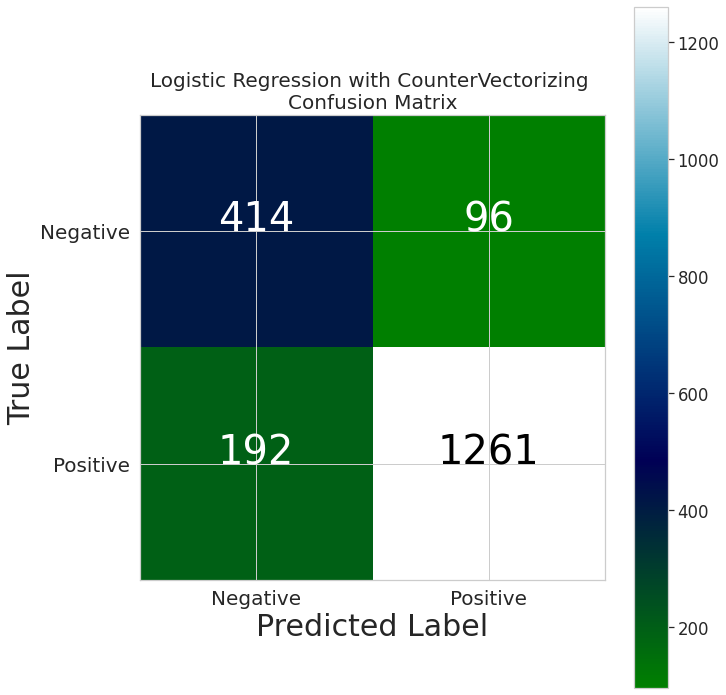

In [139]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

**Random Forest with CountVectorizer**

In [140]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

Classification Report¶


In [141]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58       510
           1       0.83      0.99      0.90      1453

    accuracy                           0.84      1963
   macro avg       0.87      0.70      0.74      1963
weighted avg       0.85      0.84      0.82      1963



Confusion Matrix¶
**bold text**

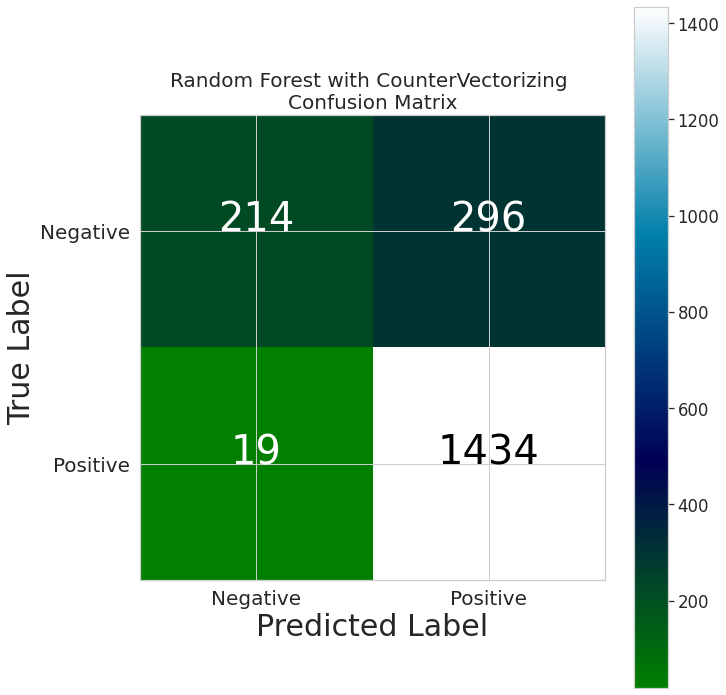

In [142]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

**Naive Bayes with CountVectorizer**

In [143]:
from sklearn.naive_bayes import MultinomialNB


In [144]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8721299450714685


Classification Report¶


In [145]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       510
           1       0.90      0.94      0.92      1453

    accuracy                           0.87      1963
   macro avg       0.85      0.82      0.83      1963
weighted avg       0.87      0.87      0.87      1963



Confusion Matrix¶


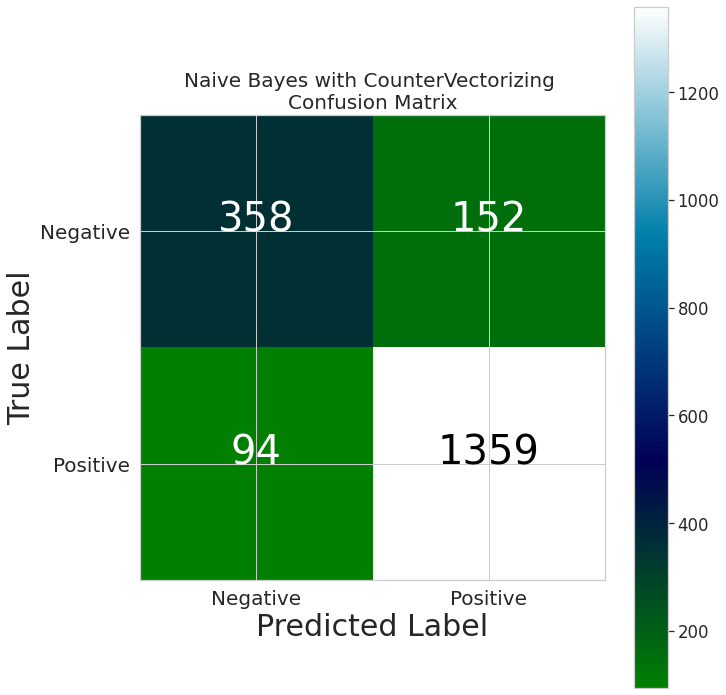

In [146]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

**XG Boost with CountVectorizer**

In [147]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.8067166896122421


Classification Report¶


In [148]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.86      0.41      0.56       510
           1       0.83      0.98      0.89      1453

    accuracy                           0.83      1963
   macro avg       0.84      0.69      0.73      1963
weighted avg       0.84      0.83      0.81      1963



Confusion Matrix¶


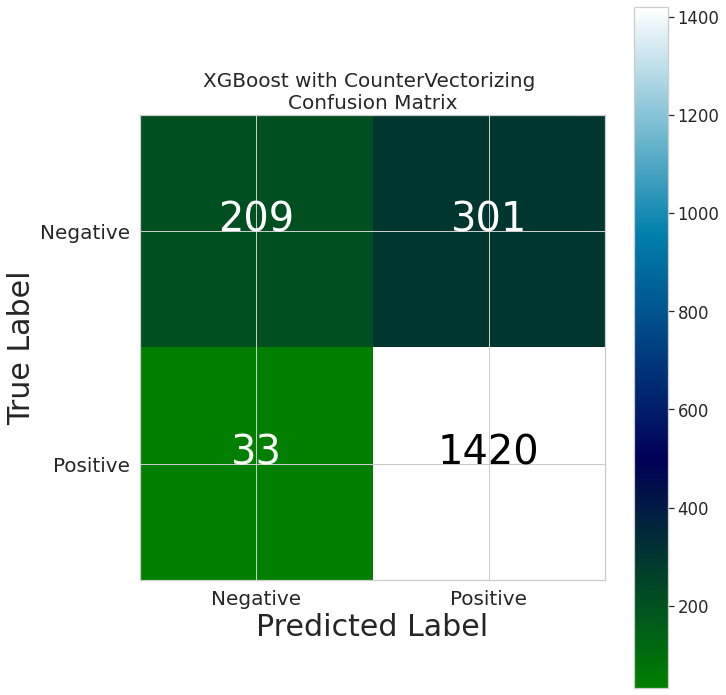

In [149]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

**CatBoost with CountVectorizer**

In [150]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.5286349	total: 47.1ms	remaining: 4.66s
1:	learn: 0.5052222	total: 85.2ms	remaining: 4.17s
2:	learn: 0.4854911	total: 123ms	remaining: 3.98s
3:	learn: 0.4740300	total: 163ms	remaining: 3.92s
4:	learn: 0.4574580	total: 202ms	remaining: 3.83s
5:	learn: 0.4492925	total: 234ms	remaining: 3.66s
6:	learn: 0.4418946	total: 271ms	remaining: 3.6s
7:	learn: 0.4338353	total: 302ms	remaining: 3.48s
8:	learn: 0.4281488	total: 333ms	remaining: 3.37s
9:	learn: 0.4202558	total: 364ms	remaining: 3.28s
10:	learn: 0.4157715	total: 411ms	remaining: 3.32s
11:	learn: 0.4066530	total: 444ms	remaining: 3.26s
12:	learn: 0.4024740	total: 480ms	remaining: 3.21s
13:	learn: 0.3969770	total: 516ms	remaining: 3.17s
14:	learn: 0.3920986	total: 547ms	remaining: 3.1s
15:	learn: 0.3879982	total: 581ms	remaining: 3.05s
16:	learn: 0.3829856	total: 614ms	remaining: 3s
17:	learn: 0.3795725	total: 645ms	remaining: 2.94s
18:	learn: 0.3759068	total: 676ms	remaining: 2.88s
19:	learn: 0.3727199	total: 711ms	remaining:

Classification Report¶


In [151]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66       510
           1       0.86      0.95      0.90      1453

    accuracy                           0.85      1963
   macro avg       0.83      0.76      0.78      1963
weighted avg       0.84      0.85      0.84      1963



Confusion Matrix¶


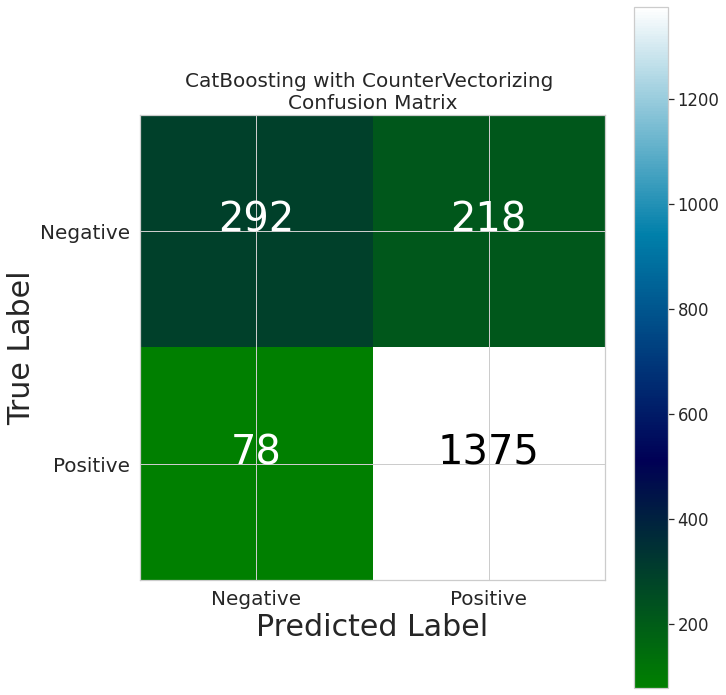

In [152]:

# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

Comparison of Models with CountVectorizer
**bold text**

In [153]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [154]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])
   



Function for f1 Score Plotting¶
**bold text**

In [155]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [156]:
from sklearn import metrics


In [157]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])
               

In [158]:
df_tv2

precision  ...  support
vectorizer model         accuracy class               ...         
CountVect  LogReg        0.853286 bad       0.683168  ...    510.0
                                  good      0.929256  ...   1453.0
                                  average   0.865321  ...   1963.0
           Random Forest 0.839531 bad       0.918455  ...    510.0
                                  good      0.828902  ...   1453.0
                                  average   0.852168  ...   1963.0
           Naive Bayes   0.874682 bad       0.792035  ...    510.0
                                  good      0.899404  ...   1453.0
                                  average   0.871509  ...   1963.0
           XGBoost       0.829852 bad       0.863636  ...    510.0
                                  good      0.825102  ...   1453.0
                                  average   0.835113  ...   1963.0
           CatBoost      0.849210 bad       0.789189  ...    510.0
                                  good      0.863151  ...   1453.0
                                  average   0.843935  ...   1963.0

[15 rows x 4 columns]

Average f1 Score - Models with CountVectorizer¶
**bold text**

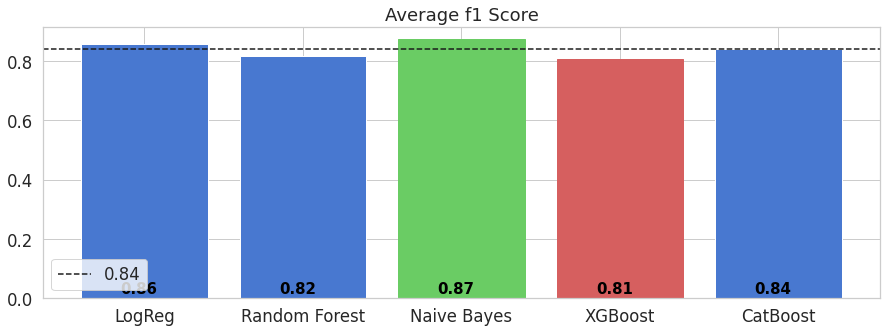

In [159]:

# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In [160]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

In [161]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8298146979597015


In [162]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       510
           1       0.94      0.82      0.87      1453

    accuracy                           0.82      1963
   macro avg       0.78      0.83      0.79      1963
weighted avg       0.85      0.82      0.83      1963



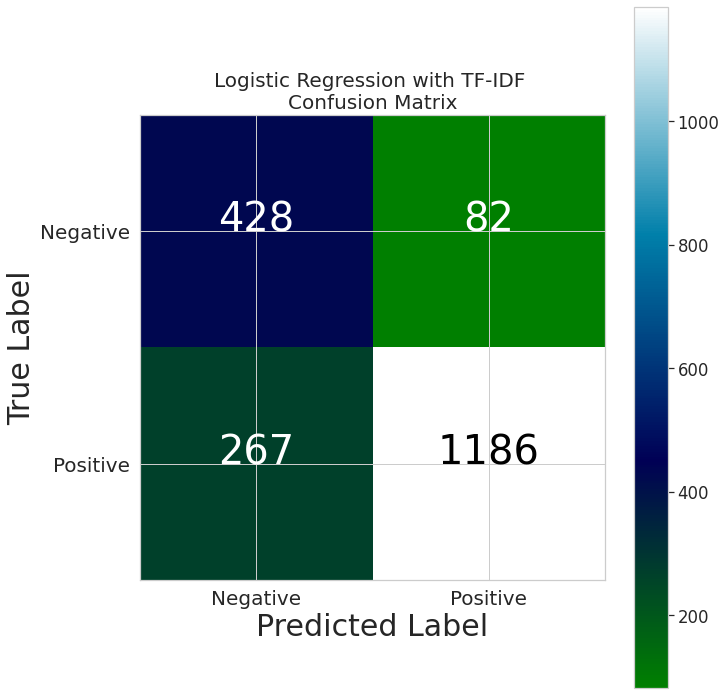

In [163]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

Random Forest with TF-IDF¶


In [164]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.7974856552861382


In [165]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.91      0.37      0.52       510
           1       0.82      0.99      0.89      1453

    accuracy                           0.83      1963
   macro avg       0.86      0.68      0.71      1963
weighted avg       0.84      0.83      0.80      1963



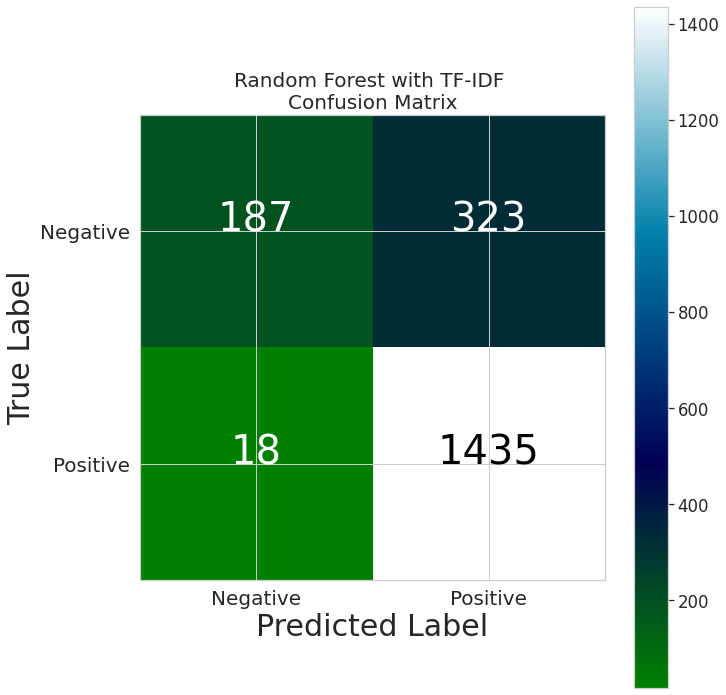

In [166]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

**Naive Bayes with TF-IDF**

In [167]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.6864902500666304


In [168]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.95      0.10      0.18       510
           1       0.76      1.00      0.86      1453

    accuracy                           0.77      1963
   macro avg       0.85      0.55      0.52      1963
weighted avg       0.81      0.77      0.69      1963



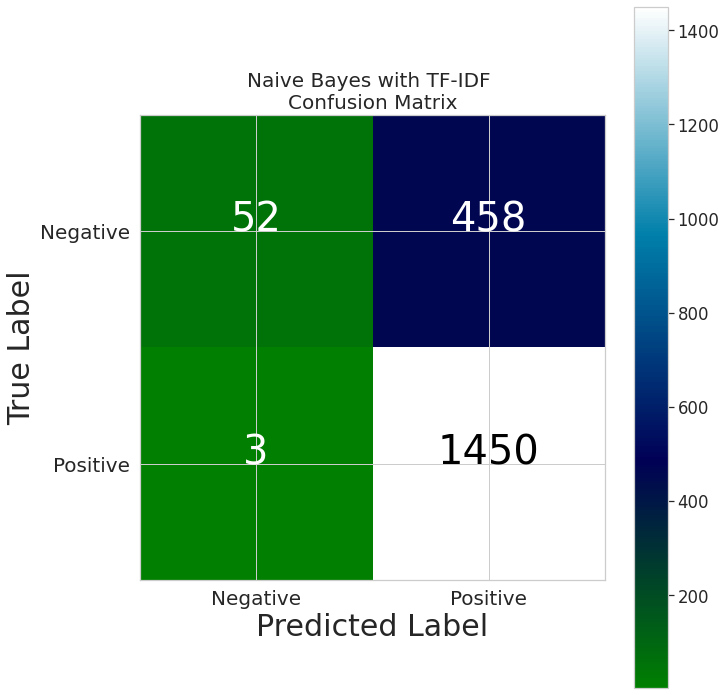

In [169]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

**XGBoost with TF-IDF**

In [170]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.8078740747043842


In [171]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.87      0.41      0.56       510
           1       0.83      0.98      0.90      1453

    accuracy                           0.83      1963
   macro avg       0.85      0.69      0.73      1963
weighted avg       0.84      0.83      0.81      1963



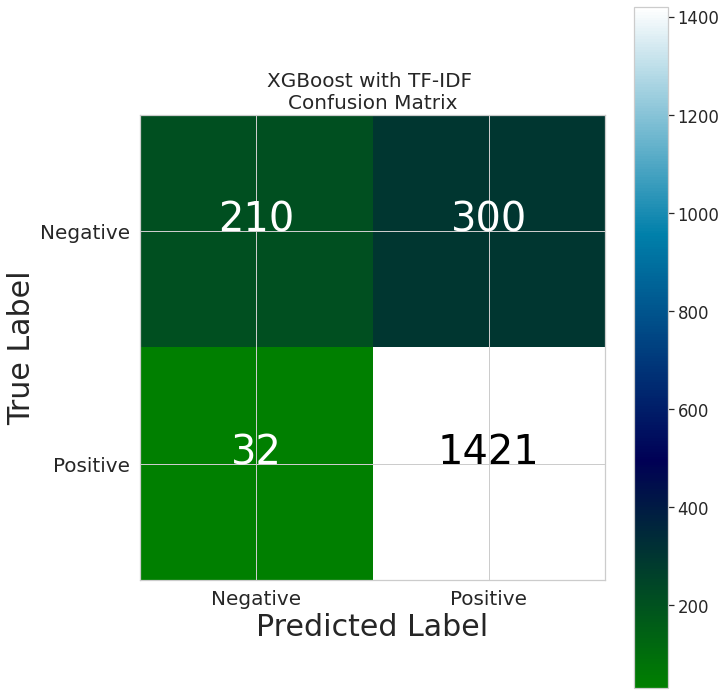

In [172]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

**CatBoost with TF-IDF**

In [173]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.5367573	total: 72.1ms	remaining: 7.14s
1:	learn: 0.5051806	total: 148ms	remaining: 7.24s
2:	learn: 0.4864222	total: 211ms	remaining: 6.82s
3:	learn: 0.4726508	total: 283ms	remaining: 6.78s
4:	learn: 0.4620895	total: 347ms	remaining: 6.6s
5:	learn: 0.4524066	total: 408ms	remaining: 6.39s
6:	learn: 0.4442295	total: 469ms	remaining: 6.23s
7:	learn: 0.4366716	total: 535ms	remaining: 6.15s
8:	learn: 0.4271391	total: 595ms	remaining: 6.02s
9:	learn: 0.4210579	total: 666ms	remaining: 6s
10:	learn: 0.4143442	total: 746ms	remaining: 6.03s
11:	learn: 0.4072180	total: 815ms	remaining: 5.98s
12:	learn: 0.4008181	total: 877ms	remaining: 5.87s
13:	learn: 0.3940157	total: 936ms	remaining: 5.75s
14:	learn: 0.3888238	total: 997ms	remaining: 5.65s
15:	learn: 0.3844133	total: 1.06s	remaining: 5.56s
16:	learn: 0.3786193	total: 1.13s	remaining: 5.5s
17:	learn: 0.3749780	total: 1.19s	remaining: 5.42s
18:	learn: 0.3712094	total: 1.26s	remaining: 5.36s
19:	learn: 0.3683466	total: 1.32s	remaining: 

In [174]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       510
           1       0.87      0.93      0.90      1453

    accuracy                           0.84      1963
   macro avg       0.81      0.76      0.78      1963
weighted avg       0.84      0.84      0.84      1963



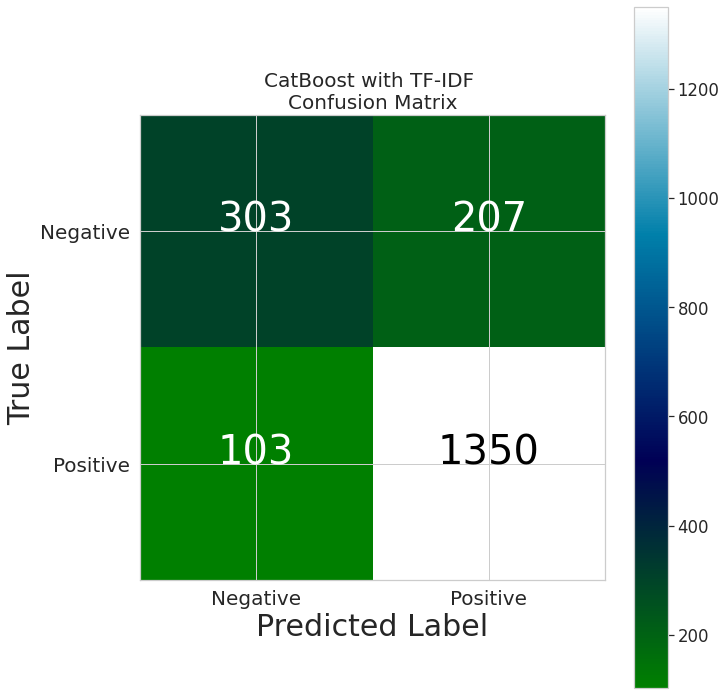

In [175]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [176]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [177]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  ...  support
vectorizer model         accuracy class               ...         
CountVect  LogReg        0.822211 bad       0.615827  ...    510.0
                                  good      0.935331  ...   1453.0
                                  average   0.852322  ...   1963.0
           Random Forest 0.826286 bad       0.912195  ...    510.0
                                  good      0.816268  ...   1453.0
                                  average   0.841191  ...   1963.0
           Naive Bayes   0.765155 bad       0.945455  ...    510.0
                                  good      0.759958  ...   1453.0
                                  average   0.808151  ...   1963.0
           XGBoost       0.830871 bad       0.867769  ...    510.0
                                  good      0.825683  ...   1453.0
                                  average   0.836617  ...   1963.0
           CatBoost      0.842078 bad       0.746305  ...    510.0
                                  good      0.867052  ...   1453.0
                                  average   0.835681  ...   1963.0

[15 rows x 4 columns]

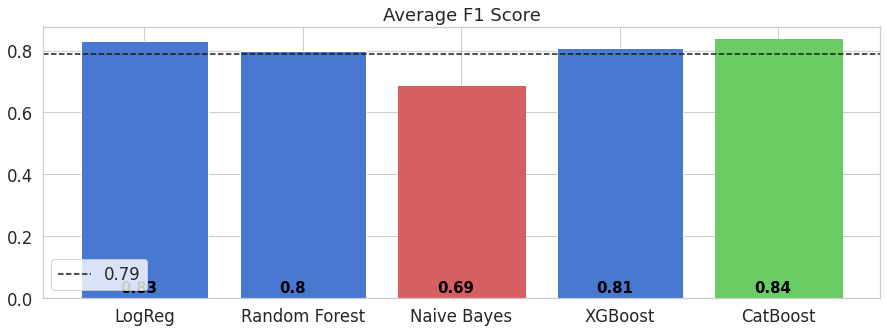

In [178]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")